# Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simulated circle area 94.8
Calculated circle area 84.94866535306801


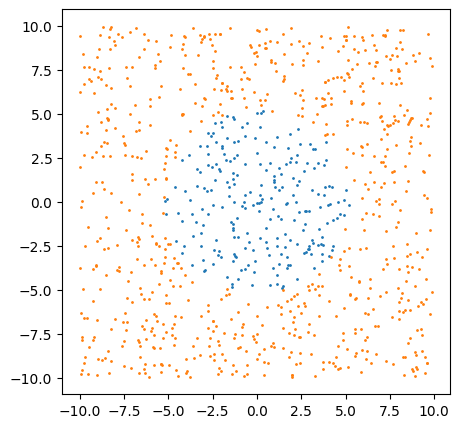

In [2]:
area = 10
N = 1e3
x, y = np.random.uniform(-10, 10, (2, int(N)))
r = np.sqrt(x**2 + y**2)
r_max = 5.2
x_in = x[r < r_max]
x_out = x[r >= r_max]
y_in = y[r < r_max]
y_out = y[r >= r_max]
plt.figure(figsize = (5,5))
plt.scatter(x_in, y_in, s=1)
plt.scatter(x_out, y_out, s=1)

ratio = len(x_in)/len(x)
ratio_2 = len(x_out)/len(x)
total_area = (2*area)**2
circle_area = total_area * ratio
print("Simulated circle area", circle_area)
print("Calculated circle area", np.pi*r_max**2)

## Exercise 1 tricky. 1. d sampler

Simulated circle area 164.61945504810518
Calculated circle area 84.94866535306801


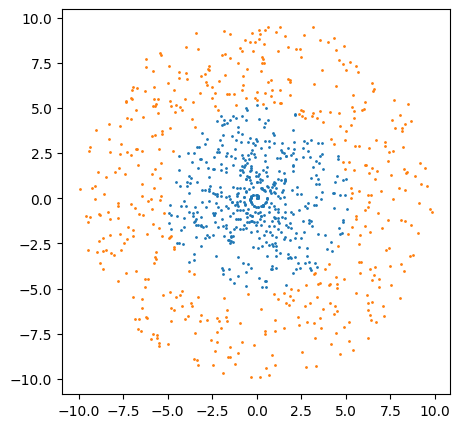

In [3]:
r = np.random.uniform(0, area, int(N))
theta = r * 2*np.pi*np.exp(r)
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.figure(figsize = (5,5))
x_in = x[r < r_max]
x_out = x[r >= r_max]
y_in = y[r < r_max]
y_out = y[r >= r_max]
plt.scatter(x_in, y_in, s=1)
plt.scatter(x_out, y_out, s=1)

total_area = np.pi*area**2
ratio = len(x_in)/len(x)
circle_area = total_area * ratio
print("Simulated circle area", circle_area)
print("Calculated circle area", np.pi*r_max**2)

# Exercise 2

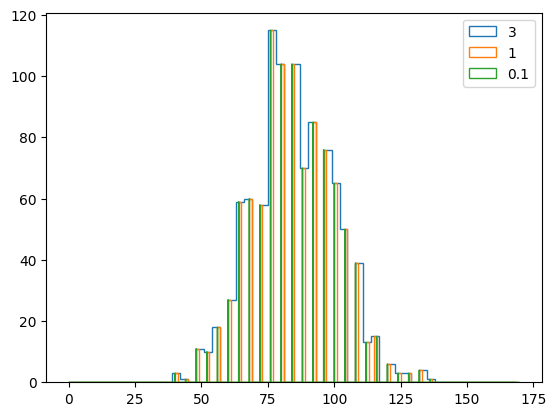

In [4]:
def sample_circle(r_max, N):
    x, y = np.random.uniform(-10, 10, (2, int(N)))
    return x, y


def many_samples(r_max, N, n_samples):
    areas = []
    for i in range(n_samples):
        x, y = sample_circle(r_max, N)
        r = np.sqrt(x**2 + y**2)
        x_in = x[r < r_max]
        x_out = x[r >= r_max]
        y_in = y[r < r_max]
        y_out = y[r >= r_max]
        ratio = len(x_in)/len(x)
        total_area = (2*area)**2
        circle_area = total_area * ratio
        areas.append(circle_area)
    return areas

areas = many_samples(5.2, 100, 1000)
bin_widths = [3, 1, 0.1]
for bin_width in bin_widths:
    plt.hist(areas, bins=np.arange(0, np.pi*r_max**2*2, bin_width), histtype = "step", alpha=1, label = str(bin_width))
plt.legend()

# Exercise 3

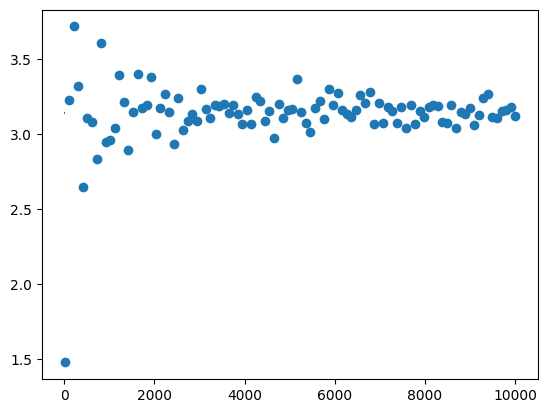

In [11]:
def sample_area(r_max, N):
    x, y = sample_circle(r_max, N)
    r = np.sqrt(x**2 + y**2)
    x_in = x[r < r_max]
    ratio = len(x_in)/len(x)
    total_area = (2*area)**2
    circle_area = total_area * ratio
    return circle_area

def sample_pi(r_max, N):
    area = sample_area(r_max, N)
    pi = area/r_max**2
    return pi
n_samples = np.linspace(10, 10000, 100)
pi_samples = [sample_pi(5.2, int(n)) for n in n_samples]
plt.plot(n_samples, pi_samples, 'o')
plt.hlines(np.pi, 0, 6, linestyles = "dashed")